### Business Problem 

- Create a predictive model,which can predict whether the person is diabetic or not

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
continuous = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

discrete_count = ['Pregnancies']

discrete_categorical = ['Outcome']

**Exploratory Data Analysis**

In [7]:
df[continuous].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
df[continuous].skew()

Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

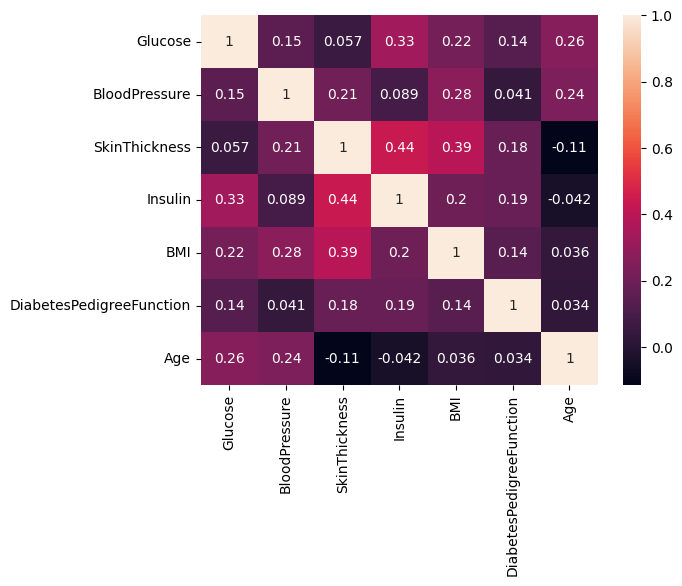

In [9]:
sns.heatmap(df[continuous].corr(),annot = True)
plt.show()

**Data Cleaning**

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Data Wrangling**

In [11]:
# no encoding required

**X & Y**

In [12]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

**Train Test Split**

In [13]:
Train = []
cv = []

for i in range(1,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = i)

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    
    from sklearn.metrics import accuracy_score
    # print('Train accuracy:',accuracy_score(y_train,ypred_train))
    Train.append(accuracy_score(y_train,ypred_train))

    from sklearn.model_selection import cross_val_score 
    cv.append(cross_val_score(model,x_train,y_train,cv =5).mean())

    em = pd.DataFrame({'Train':Train,'cv':cv})
    # print(em)
    # gm = em[abs(em['Train'] - em['cv'])<=0.5]
    gm = em[abs(em['Train'] - em['cv']) <= 0.5]
    rs = gm[gm['cv'] == gm['cv'].max()].index.tolist()[0]
print('Best random state is :',rs)

Best random state is : 93


In [14]:

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 16)

- trian size = 768*0.8 = 614 records
- test size = 768* 0.2 = 154 records

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.iloc[:,1:8] = sc.fit_transform(x_train.iloc[:,1:8])
x_test.iloc[:,1:8] = sc.transform(x_test.iloc[:,1:8])

In [27]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,6,0.399917,0.052795,0.128089,0.412504,0.399967,0.220621,-0.359850
222,7,-0.062569,-3.520604,-1.300722,-0.694292,-0.872596,-0.790785,0.343806
565,2,-0.802546,-0.763982,-0.431011,0.054924,-0.760311,0.846296,-0.975548
576,6,-0.401725,-1.274468,-0.058278,0.412504,-1.022309,1.043718,0.167892
152,9,1.078230,0.869571,0.438700,0.625349,0.262730,2.185726,0.783590
...,...,...,...,...,...,...,...,...
321,3,-0.278395,0.256989,0.562945,-0.694292,-0.074125,-0.827232,-0.711677
581,6,-0.370892,-0.457691,0.376578,-0.694292,-0.897548,-0.799896,-0.535764
121,6,-0.309228,-0.253497,1.122044,-0.694292,0.250254,-0.635884,-0.799634
238,9,1.324889,0.767474,0.003845,-0.694292,-0.173934,1.098388,-0.095979


- 🔍 Let's break down this code line by line:

- from sklearn.preprocessing import StandardScaler

- ✅ You're importing StandardScaler, a tool from scikit-learn used to standardize features.

- sc = StandardScaler()

- ✅ Creating an instance of the scaler.

- x_train.iloc[:, 1:8] = sc.fit_transform(x_train.iloc[:, 1:8])

- What’s happening here:

- x_train.iloc[:, 1:8]: You're selecting columns from index 1 to 7, i.e., the 2nd to 8th columns (Python is 0-indexed).

- fit_transform():

- fit() calculates the mean and standard deviation of each selected column (on training data).

- transform() then scales the data using the formula:

- **z= x−μ/𝜎**
​
 
- Where:

- x = original value

- μ = mean of the column

- σ = standard deviation of the column

- 🎯 Result: Each column now has mean = 0 and standard deviation = 1 → This helps some models converge faster and perform better.

- x_test.iloc[:, 1:8] = sc.transform(x_test.iloc[:, 1:8])

- What's happening here:

- You're applying the same scaling to the test set, using the mean and std of the training set.

- ❗ Never use fit_transform() on test data — that would cause data leakage.

- 🤔 Why Use StandardScaler?

- Here’s why scaling is important:

- Model Type	Needs Scaling?	Why?

- Logistic Regression	✅ Yes	Gradient descent works better on scaled features

- KNN, SVM, K-Means	✅ Yes	Distance-based models need features on same scale

- Tree-based models	❌ No	Decision Trees, Random Forests, etc., don’t care about scaling

- ✅ TL;DR Summary

- Line	What It Does

- sc = StandardScaler()	Creates a scaler object

- fit_transform(x_train)	Learns scaling from training data and applies it

- transform(x_test)	Applies same scaling to test data

- 🎯 Purpose	Ensures model treats all features fairly by removing scale bias

### Modelling

**Logistic Regression(Baseline Model)**

In [16]:
# Modeling 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

### Evaluation 
**train**

In [17]:
# prediction 
ypred_train = log_reg.predict(x_train)

# train Accuracy 
from sklearn.metrics import accuracy_score 
print('Train accuracy :',accuracy_score(ypred_train,y_train))

# cross validation score 
from sklearn.model_selection import cross_val_score 
print('Cross validation score:',cross_val_score(log_reg,x_train,y_train,cv = 5).mean())

Train accuracy : 0.7719869706840391
Cross validation score: 0.752472344395575


**test**

In [18]:
ypred_test = log_reg.predict(x_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Test Accuracy: 0.8181818181818182


**Confusion Matrix**

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[95,  7],
       [21, 31]], dtype=int64)

- ​A confusion matrix is a vital tool in evaluating the performance of classification models, especially in binary classification tasks like predicting diabetes presence. It provides a detailed breakdown of correct and incorrect predictions, allowing for a deeper understanding beyond overall accuracy.​

- 📊 Understanding the Confusion Matrix

- Given your confusion matrix:
[[357,  37],
 [106, 115]]
- This matrix can be interpreted as follows:​

- True Negatives (TN): 357 cases where the model correctly predicted non-diabetic individuals.​

- False Positives (FP): 37 cases where the model incorrectly predicted diabetic status for non-diabetic individuals.​

- False Negatives (FN): 106 cases where the model failed to identify diabetic individuals.​

- True Positives (TP): 115 cases where the model correctly identified diabetic individuals.​

- 📈 Key Metrics Derived from the Confusion Matrix

- Using these values, several performance metrics can be calculated:

- Accuracy: The overall correctness of the model.​

+2
Plat.AI
+2
KeyToDataScience
    
- Accuracy= TP+TN/TP+TN+FP+FN = 115+357/115+357+37+106 ≈78.5%
- Precision: The proportion of positive identifications that were actually correct.​

- Precision= TP/TP+FP = 115/115+37 ≈75.6%
- Recall (Sensitivity): The proportion of actual positives correctly identified.​

- Recall= TP/TP+FN = 115/ 115+106 ≈52.0%
- F1 Score: The harmonic mean of precision and recall, balancing both metrics.​

- F1 Score=2× Precision×Recall/Precision+Recall ≈61.5%

- 🧠 Importance of the Confusion Matrix
- The confusion matrix is crucial because it reveals not just how often the model is correct, but also the types of errors it makes. In medical diagnostics, for instance, a high number of false negatives (missed diagnoses) can be more critical than false positives. Therefore, understanding the balance between precision and recall is essential for evaluating model performance in such contexts.

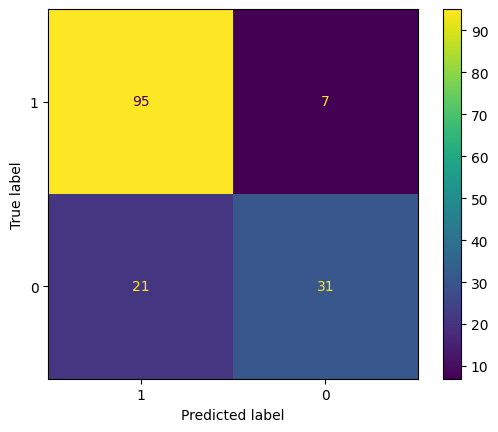

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay 

ConfusionMatrixDisplay(cm,display_labels=df['Outcome'].unique()).plot()

plt.show()

- ​The code snippet you've provided is used to visualize a confusion matrix, which is a valuable tool for evaluating the performance of classification models. Let's break down the components of your code and understand their purpose:​

- from sklearn.metrics import ConfusionMatrixDisplay 

- ConfusionMatrixDisplay(cm, display_labels=df['Outcome'].unique()).plot()
 
- 🧩 Components Explained

- from sklearn.metrics import ConfusionMatrixDisplay: This line imports the ConfusionMatrixDisplay class from scikit-learn's metrics module. This class is designed to create a visual representation of a confusion matrix.

- ConfusionMatrixDisplay(cm, display_labels=df['Outcome'].unique()):

- cm: This is your confusion matrix, typically obtained using confusion_matrix(y_true, y_pred). It contains counts of true positives, false positives, true negatives, and false negatives.​

- display_labels=df['Outcome'].unique(): This specifies the labels to display on the axes of the confusion matrix plot. By using df['Outcome'].unique(), you're extracting the unique classes from the 'Outcome' column of your DataFrame.​

- .plot(): This method generates the plot of the confusion matrix with the specified labels.

- 📌 Purpose of Using ConfusionMatrixDisplay

- Visual Interpretation: While numerical metrics like accuracy, precision, and recall provide quantitative measures of model performance, a confusion matrix offers a visual representation that can make it easier to understand how well your model is performing across different classes.​

- Error Analysis: By visualizing the confusion matrix, you can quickly identify where your model is making mistakes, such as misclassifying one class as another. This can be particularly helpful for diagnosing issues and improving model performance.​

- ✅ Example Usage
= Here's how you might use ConfusionMatrixDisplay in a complete context:

- from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
- import matplotlib.pyplot as plt

- ##### Assume y_test and y_pred are defined
- cm = confusion_matrix(y_test, y_pred)

- disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
- disp.plot()
- plt.show()
- In this example, the confusion matrix is computed and then displayed with custom labels for better interpretability.​

- 🔍 Additional Tips
- Normalization: You can normalize the confusion matrix to show percentages instead of raw counts by setting the normalize parameter.​

- Customization: The plot() method accepts various parameters to customize the appearance of the plot, such as cmap for color mapping.​

- Integration with Pipelines: ConfusionMatrixDisplay can be used in conjunction with scikit-learn pipelines to streamline the evaluation process.​

- For more detailed information and advanced usage, you can refer to the scikit-learn documentation on ConfusionMatrixDisplay.

**Classification Report**

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       102
           1       0.82      0.60      0.69        52

    accuracy                           0.82       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154



- ChatGPT said:
​
- The classification_report function from scikit-learn provides a comprehensive summary of key performance metrics for classification models. It's particularly useful for evaluating how well your model distinguishes between different classes, especially in binary classification tasks like predicting diabetes presence.​

- 🔍 What Does the Code Do?

- from sklearn.metrics import classification_report
- print(classification_report(y_test, ypred_test))
- y_test: The actual labels from your test dataset.​

- ypred_test: The labels predicted by your classification model.​

- classification_report: Generates a text report showing the main classification metrics.​
- Scikit-learn
+2
Runebook

- 📊 Metrics Explained
 The report includes the following metrics for each class:

- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It indicates the accuracy of positive predictions.​

- **Precision= True Positives/True Positives+False Positives**

 
- Recall (Sensitivity): The ratio of correctly predicted positive observations to all actual positives. It measures the model's ability to detect positive instances.​

- **Recall= True Positives/True Positives+False Negatives**

​
 
- F1-Score: The weighted average of Precision and Recall. It provides a balance between the two metrics.​

- F1-Score=2× Precision×Recall/Precision+Recall

​- Support: The number of actual occurrences of the class in the dataset.​
- Data Science Stack Exchange
+1
Stack Overflow


- 🧠 Why Use classification_report?
- Comprehensive Evaluation: Provides a detailed breakdown of model performance for each class.​
Stack Overflow

- Handles Imbalanced Datasets: Metrics like Precision, Recall, and F1-Score are more informative than accuracy in cases where class distribution is uneven.​

- Quick Assessment: Offers a concise summary that helps in comparing different models or tuning parameters.​

📌 Example Output
- For a binary classification problem (e.g., predicting diabetic vs. non-diabetic), the output might look like this:​

|precision |   recall | f1-score |  support|
|----------|----------|----------|---------|
|   0 |      0.89   |   0.91 |     0.90 |      394|
| 1   |    0.76     | 0.72   |   0.74   |    221|
|accuracy                 | 0.85   |    615|
|macro avg  |    | 0.83      |0.82      |0.82|       615|
|weighted avg      | 0.85    |  0.85    |  0.85       |615|

- Class 0: Represents non-diabetic individuals.​

- Class 1: Represents diabetic individuals.​
Stack Overflow

- Accuracy: Overall, the model correctly predicted 85% of the instances.​

- Macro Avg: Average metrics calculated independently for each class and then averaged.​

- Weighted Avg: Average metrics weighted by the number of instances in each class.​

- 🔧 Additional Tips
- Custom Labels: You can specify custom class names using the target_names parameter.​

- print(classification_report(y_test, ypred_test, target_names=['Non-Diabetic', 'Diabetic']))

- Dictionary Output: To obtain the report as a dictionary for further analysis or exporting, set output_dict=True.​
Stack Overflow
+1

- report = classification_report(y_test, ypred_test, output_dict=True)

- Formatting Precision: Control the number of decimal places in the output using the digits parameter.​


- print(classification_report(y_test, ypred_test, digits=4))

- For more detailed information, refer to the scikit-learn documentation on classification_report.

In [22]:
# from chatgpt
print(classification_report(y_test, ypred_test, target_names=['Non-Diabetic', 'Diabetic']))


              precision    recall  f1-score   support

Non-Diabetic       0.82      0.93      0.87       102
    Diabetic       0.82      0.60      0.69        52

    accuracy                           0.82       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154



In [23]:
# from chat gpt
report = classification_report(y_test, ypred_test, output_dict=True)

report


{'0': {'precision': 0.8189655172413793,
  'recall': 0.9313725490196079,
  'f1-score': 0.8715596330275229,
  'support': 102.0},
 '1': {'precision': 0.8157894736842105,
  'recall': 0.5961538461538461,
  'f1-score': 0.6888888888888889,
  'support': 52.0},
 'accuracy': 0.8181818181818182,
 'macro avg': {'precision': 0.8173774954627949,
  'recall': 0.763763197586727,
  'f1-score': 0.780224260958206,
  'support': 154.0},
 'weighted avg': {'precision': 0.8178930869493484,
  'recall': 0.8181818181818182,
  'f1-score': 0.809878602539153,
  'support': 154.0}}

In [24]:
# from chatgpt
print(classification_report(y_test, ypred_test, digits=4))


              precision    recall  f1-score   support

           0     0.8190    0.9314    0.8716       102
           1     0.8158    0.5962    0.6889        52

    accuracy                         0.8182       154
   macro avg     0.8174    0.7638    0.7802       154
weighted avg     0.8179    0.8182    0.8099       154



**ROC**

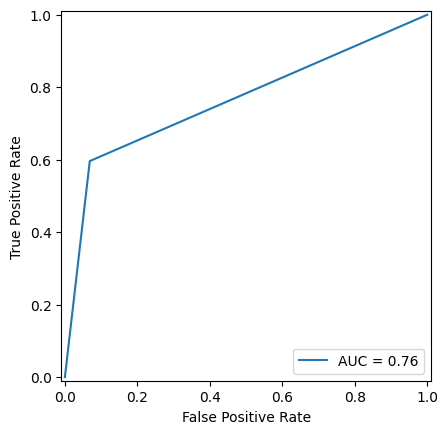

In [25]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,threshols = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc).plot()
plt.show()

- ​The code you've provided is designed to evaluate and visualize the performance of a binary classification model using the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric. Let's delve into each component of the code to understand its functionality and significance:​

- from sklearn.metrics import roc_curve, auc, RocCurveDisplay
- import matplotlib.pyplot as plt

- fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
- roc_auc = auc(fpr, tpr)
- RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
- plt.show()
- 📈 ROC Curve and AUC Explained
- ROC Curve: A graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.​

- AUC (Area Under the Curve): A single scalar value summarizing the performance of the classifier across all thresholds. An AUC of 1 indicates perfect classification, while an AUC of 0.5 suggests no discriminative ability, equivalent to random guessing.​

- 🔍 Detailed Breakdown of the Code
Importing Necessary Functions:

- from sklearn.metrics import roc_curve, auc, RocCurveDisplay
- import matplotlib.pyplot as plt
- roc_curve: Computes the ROC curve by calculating TPR and FPR at various threshold levels.​

- auc: Calculates the area under the ROC curve, providing a single metric to evaluate the model's performance.​

- RocCurveDisplay: A utility for visualizing the ROC curve.​

- matplotlib.pyplot: A plotting library used to display the ROC curve.​

- Computing the ROC Curve:

- **fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)**

- y_test: The true binary labels from the test dataset.​

- y_pred_test: The predicted probabilities or scores for the positive class. It's crucial to use probabilities rather than class labels to obtain a meaningful ROC curve.​

- fpr: An array of false positive rates corresponding to different threshold values.​

- tpr: An array of true positive rates corresponding to different threshold values.​

- thresholds: The threshold values used to compute FPR and TPR.​

- Note: If y_pred_test contains class labels instead of probabilities, the ROC curve will not be informative. Ensure that y_pred_test contains the predicted probabilities for the positive class, typically obtained using model.predict_proba(X_test)[:, 1] or model.decision_function(X_test) depending on the classifier used.

- Calculating the AUC:

- **roc_auc = auc(fpr, tpr)**

- roc_auc: A scalar value representing the area under the ROC curve, summarizing the model's ability to distinguish between the positive and negative classes across all thresholds.​

- Plotting the ROC Curve:

- **RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()**

- plt.show()

- RocCurveDisplay: Creates a visual representation of the ROC curve using the computed FPR, TPR, and AUC.​

- .plot(): Generates the plot of the ROC curve.​
GitHub

- plt.show(): Displays the plot.​

- 🧠 Importance of ROC Curve and AUC
Threshold Selection: The ROC curve helps in selecting an optimal threshold that balances sensitivity (TPR) and specificity (1 - FPR) based on the specific requirements of the application.​
Scikit-learn

- Model Comparison: AUC provides a single metric to compare the performance of different classifiers. A higher AUC indicates better model performance.​

- Handling Imbalanced Datasets: ROC curves and AUC are particularly useful when dealing with imbalanced datasets, as they consider the trade-off between TPR and FPR across all thresholds.​

- ⚠️ Common Pitfalls

- Using Class Labels Instead of Probabilities: Ensure that the input to roc_curve is the predicted probabilities for the positive class, not the predicted class labels. Using class labels will result in a single point on the ROC space, which doesn't provide meaningful insights into the model's performance across different thresholds.​

- Interpreting AUC Values: While a higher AUC indicates better performance, it's essential to consider the context of the problem. For instance, in medical diagnostics, a model with a slightly lower AUC but higher sensitivity might be preferred to minimize false negatives.​

- 📘 Further Reading
- scikit-learn documentation on roc_curve

- scikit-learn documentation on auc

- scikit-learn documentation on RocCurveDisplay

**AUC Score**

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7637631975867271

- The roc_auc_score function from scikit-learn computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) for a set of true labels and predicted scores. This metric evaluates the ability of a binary classifier to distinguish between classes across all possible classification thresholds.​

- 🔍 Understanding the Code

**from sklearn.metrics import roc_auc_score**

**roc_auc_score(y_test, y_pred_test)**

- y_test: An array of true binary labels from your test dataset (e.g., 0 for non-diabetic, 1 for diabetic).​

- y_pred_test: An array of predicted scores from your model. These should be continuous values representing the confidence or probability that a given instance belongs to the positive class (e.g., the probability of being diabetic).​

- It's crucial to use predicted probabilities or confidence scores rather than discrete class labels (0 or 1) when computing the ROC AUC. Using class labels can lead to misleading or undefined AUC values because the ROC curve is based on varying classification thresholds. ​

- 📈 What is ROC AUC?

- ROC Curve: A plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.​

- AUC (Area Under the Curve): A single scalar value summarizing the performance of the classifier across all thresholds. An AUC of 1.0 indicates perfect classification, while an AUC of 0.5 suggests no discriminative ability, equivalent to random guessing.​

- ✅ Why Use roc_auc_score?

- Threshold-Invariant Evaluation: Unlike accuracy, which depends on a specific threshold, AUC evaluates the model's performance across all possible thresholds.​

- Class Imbalance Robustness: AUC is particularly useful when dealing with imbalanced datasets, as it considers the trade-off between TPR and FPR, providing a more balanced evaluation.​

- Model Comparison: AUC allows for the comparison of different models' ability to rank positive instances higher than negative ones, regardless of the chosen classification threshold.​

- ⚠️ Important Considerations

- Use of Probabilities: Ensure that y_pred_test contains predicted probabilities or confidence scores. For example, if using a logistic regression model, obtain probabilities using model.predict_proba(X_test)[:, 1].​

- Binary Classification: The basic usage of roc_auc_score is for binary classification tasks. For multiclass or multilabel settings, additional parameters and considerations are required.​

- Interpretation: An AUC close to 1.0 indicates excellent model performance, while an AUC near 0.5 suggests that the model performs no better than random chance.​

- For more detailed information and advanced usage, refer to the scikit-learn documentation on roc_auc_score.